In [1]:
import tqdm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
path = r'C:\Users\Ashwani Raj\Desktop\__DOCS__\06_IDBI_STATEMENT.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Date,Description,Amount,Type
0,2023-02-04,UPI/303595961758/Aparajita Kumari,500.0,Dr
1,2023-02-04,UPI/303568251357/ASHWANI RAJ,500.0,Dr
2,2023-02-01,UPI/303275341989/ASHWANI RAJ,200.0,Dr
3,2023-02-01,ACHECS-HCL 4th IntDiv2-1002421,120.0,Cr
4,2023-01-31,UPI/303180199455/ASHWANI RAJ,200.0,Dr


In [5]:
df.shape

(536, 4)

In [6]:
df.columns

Index(['Date', 'Description', 'Amount', 'Type'], dtype='object')

In [7]:
df.dtypes

Date           datetime64[ns]
Description            object
Amount                float64
Type                   object
dtype: object

In [8]:
df_2 = df[df['Type'] == 'Dr']
df_2.describe()

,Amount
count,392.000000
mean,755.986531
std,2021.101045
min,1.000000
25%,63.750000
50%,197.500000
75%,500.000000
max,23999.000000


In [9]:
df['Type'].value_counts()

Dr    392
Cr    144
Name: Type, dtype: int64

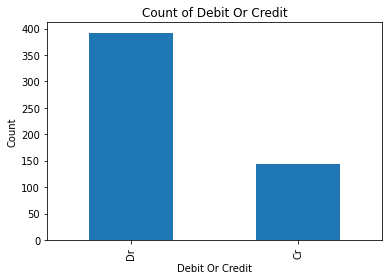

In [10]:
# Create a bar chart of the casual and member values
df['Type'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel('Debit Or Credit')
plt.ylabel('Count')
plt.title('Count of Debit Or Credit')

# Show the chart
plt.show()


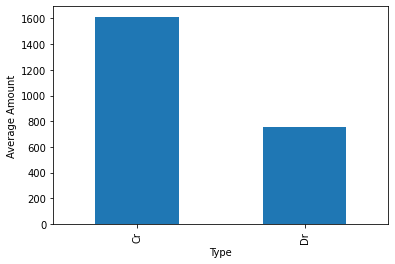

In [11]:

# Group data by member_casual and calculate mean of ride_length
Type_mean = df.groupby('Type')['Amount'].mean()

# Plot bar chart
Type_mean.plot(kind='bar')
plt.ylabel('Average Amount')
plt.show()


In [12]:
cx = df.groupby("Amount")
cx.head()

,Date,Description,Amount,Type
0,2023-02-04,UPI/303595961758/Aparajita Kumari,500.00,Dr
1,2023-02-04,UPI/303568251357/ASHWANI RAJ,500.00,Dr
2,2023-02-01,UPI/303275341989/ASHWANI RAJ,200.00,Dr
3,2023-02-01,ACHECS-HCL 4th IntDiv2-1002421,120.00,Cr
4,2023-01-31,UPI/303180199455/ASHWANI RAJ,200.00,Dr
...,...,...,...,...
527,2021-12-09,UPI/134318498396/flipkart,264.00,Dr
530,2021-12-04,NEFT-N338210888414360-NEXTBILL,35.48,Cr
532,2021-12-04,UPI/133840864700/Ayana jeneral store,37.00,Dr
533,2021-12-03,ACH10-OIL AND NATURAL-701441,22.00,Cr


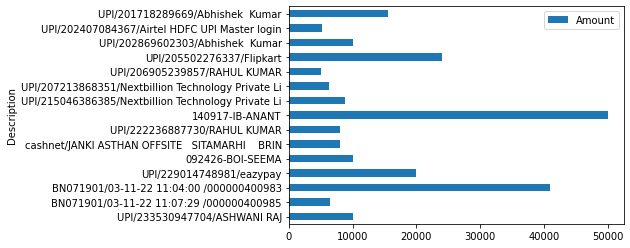

In [13]:
# Create a new dataframe that only contains transactions with amounts greater than 500
df_filtered = df[df['Amount'] > 5000]

# Plot the filtered amounts of transactions using a bar chart
df_filtered.plot(kind='barh', x='Description', y='Amount')
plt.show()


In [14]:
gru = df.groupby('Amount')
gru.head()

,Date,Description,Amount,Type
0,2023-02-04,UPI/303595961758/Aparajita Kumari,500.00,Dr
1,2023-02-04,UPI/303568251357/ASHWANI RAJ,500.00,Dr
2,2023-02-01,UPI/303275341989/ASHWANI RAJ,200.00,Dr
3,2023-02-01,ACHECS-HCL 4th IntDiv2-1002421,120.00,Cr
4,2023-01-31,UPI/303180199455/ASHWANI RAJ,200.00,Dr
...,...,...,...,...
527,2021-12-09,UPI/134318498396/flipkart,264.00,Dr
530,2021-12-04,NEFT-N338210888414360-NEXTBILL,35.48,Cr
532,2021-12-04,UPI/133840864700/Ayana jeneral store,37.00,Dr
533,2021-12-03,ACH10-OIL AND NATURAL-701441,22.00,Cr


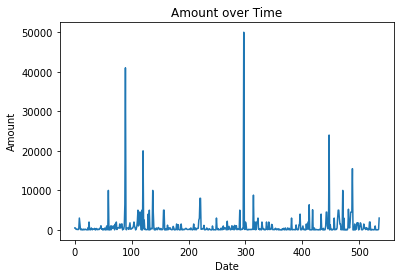

In [15]:
# Assuming you have a DataFrame named df
df['Date'] = pd.to_datetime(df['Date'])

# Plot the line chart
df['Amount'].plot()
plt.title('Amount over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

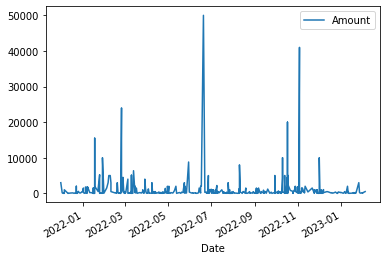

In [16]:
start_date = '2021-01-01'
end_date = '2023-02-04'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df.plot(x='Date', y='Amount')
plt.show()


<AxesSubplot:>

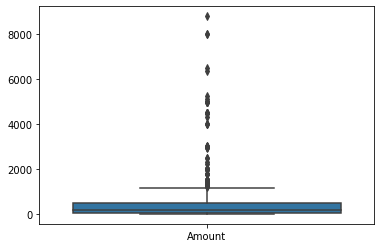

In [17]:
sns.boxplot(df[df['Amount'] < 10000])


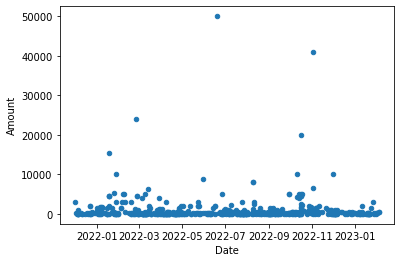

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.plot(kind='scatter', x='Date', y='Amount')
plt.show()

C:\Users\ASHWAN~1\AppData\Local\Temp/ipykernel_15656/2131483064.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Description').sum().sort_values('Amount',ascending=False)


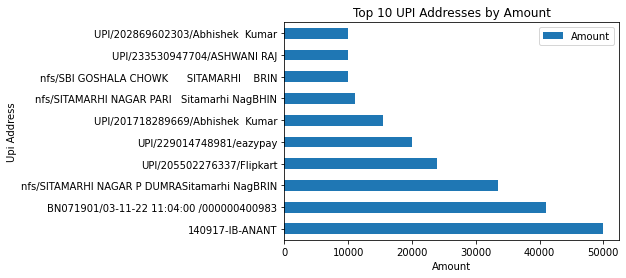

In [19]:
df_grouped = df.groupby('Description').sum().sort_values('Amount',ascending=False)
df_grouped = df_grouped.head(10)
df_grouped.plot(kind='barh', y='Amount')
plt.xlabel('Amount')
plt.ylabel('Upi Address')
plt.title('Top 10 UPI Addresses by Amount')
plt.show()


In [20]:
fr = df.copy()

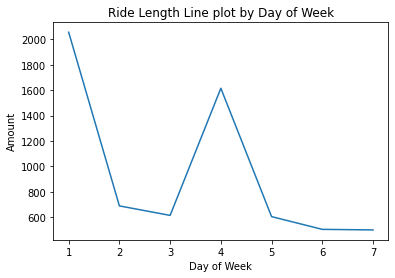

In [21]:
# Assume the DataFrame has a column called 'start_time'
df['day_of_week'] = df['Date'].dt.weekday
df['day_of_week'] = df['day_of_week'].apply(lambda x: x+1)
df['day_of_week'] = df['day_of_week'].apply(lambda x: 7 if x == 0 else x)

df.groupby('day_of_week')['Amount'].mean().plot(kind='line')
plt.xlabel('Day of Week')
plt.ylabel('Amount')
plt.title('Ride Length Line plot by Day of Week')
plt.show()


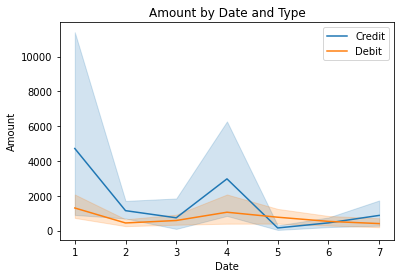

In [22]:
# Create two sub-dataframes for each value of 'Type' column
df_credit = df[df['Type'] == 'Cr']
df_debit = df[df['Type'] == 'Dr']

# Plot two lines using the two sub-dataframes
sns.lineplot(x='day_of_week', y='Amount', data=df_credit, label='Credit')
sns.lineplot(x='day_of_week', y='Amount', data=df_debit, label='Debit')

# Add title, x-axis label, y-axis label and legend
plt.title("Amount by Date and Type")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()

# Show plot
plt.show()

C:\Users\ASHWAN~1\AppData\Local\Temp/ipykernel_15656/4075615064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit["Month"] = df['Date'].dt.month
C:\Users\ASHWAN~1\AppData\Local\Temp/ipykernel_15656/4075615064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debit["Month"] = df['Date'].dt.month


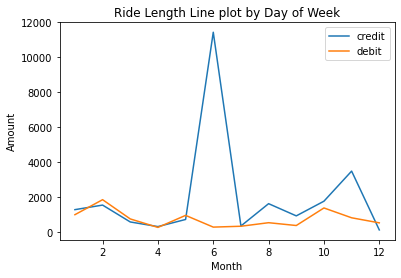

In [23]:
df_credit["Month"] = df['Date'].dt.month
df_debit["Month"] = df['Date'].dt.month
df_credit.groupby('Month')['Amount'].mean().plot(kind='line',label = 'credit')
df_debit.groupby('Month')['Amount'].mean().plot(kind='line', label = 'debit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Ride Length Line plot by Day of Week')
plt.legend()
plt.show()

C:\Users\ASHWAN~1\AppData\Local\Temp/ipykernel_15656/420943071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  liye = df[df['Type'] == 'Dr'].groupby('Description').mean()


<AxesSubplot:ylabel='Description'>

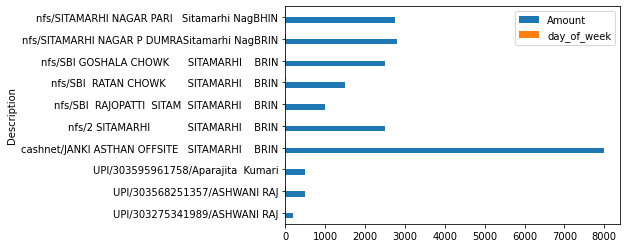

In [24]:
liye = df[df['Type'] == 'Dr'].groupby('Description').mean()
liye.tail(10).plot(kind = 'barh', title = "")

<AxesSubplot:xlabel='Date'>

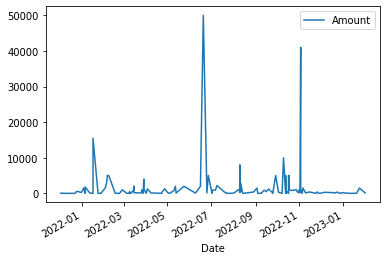

In [25]:
df_credit.head()
df_credit.plot(x= 'Date', y = 'Amount' )

<AxesSubplot:xlabel='Date'>

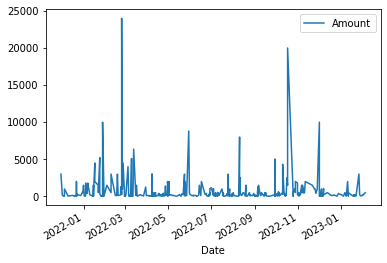

In [26]:
df_debit.head()
df_debit.plot(x = 'Date', y = 'Amount')

In [32]:
fr.tail(10)

,Date,Description,Amount,Type
526,2021-12-10,ACHECS-POWER FINANCE C-8384206,2.50,Cr
527,2021-12-09,UPI/134318498396/flipkart,264.00,Dr
528,2021-12-05,nfs/SITAMARHI NAGAR P DUMRASitamarhi NagBRIN,1000.00,Dr
529,2021-12-05,UPI/133959441927/billdesktez,15.00,Dr
530,2021-12-04,NEFT-N338210888414360-NEXTBILL,35.48,Cr
531,2021-12-04,UPI/133843499174/GOOGLEPAY,5.00,Cr
532,2021-12-04,UPI/133840864700/Ayana jeneral store,37.00,Dr
533,2021-12-03,ACH10-OIL AND NATURAL-701441,22.00,Cr
534,2021-12-02,UPI/133613841804/EURONETGPAY,149.00,Dr
535,2021-11-30,UPI/133477435308/NextbillionTechnology,3000.00,Dr


In [35]:
df_credit.columns

Index(['Date', 'Description', 'Amount', 'Type', 'day_of_week', 'Month'], dtype='object')

In [50]:
df_credit = df_credit[['Date', 'Description', 'Amount', 'Type']].reset_index(drop = True)
df_debit = df_debit[['Date', 'Description', 'Amount', 'Type']].reset_index(drop = True)

C:\Users\ASHWAN~1\AppData\Local\Temp/ipykernel_15656/2173346497.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_debit[df_debit['Amount'] < df['Amount'].mean()].groupby('Description').sum().sort_values(by = 'Amount', ascending = False).head(10).plot(kind = 'barh')


<AxesSubplot:ylabel='Description'>

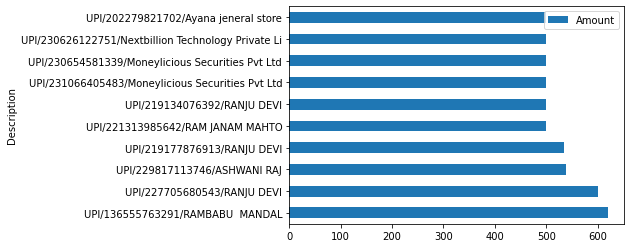

In [63]:
df_debit[df_debit['Amount'] < df['Amount'].mean()].groupby('Description').sum().sort_values(by = 'Amount', ascending = False).head(10).plot(kind = 'barh')